In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import dirichlet, multivariate_normal
from dirichlet.simplex import scatter
import tensorflow as tf

In [2]:
D = 3;
x = tf.placeholder(tf.float32, (None,D));
log_alpha = tf.get_variable('alpha', (D,));

In [14]:
alpha = tf.exp(log_alpha);

alpha_0 = tf.reduce_sum(alpha);
log_gamma_alpha_0 = tf.lgamma(alpha_0);
sum_log_gamma_alpha = tf.reduce_sum(tf.lgamma(alpha));

log_x = tf.reduce_mean(tf.log(x), 0);

dotprod_term = tf.tensordot(alpha-1, log_x, [0,0]);

N = tf.cast(tf.shape(x)[0], tf.float32);
log_lik = N*(log_gamma_alpha_0 - sum_log_gamma_alpha + dotprod_term);

grad = tf.gradients(-log_lik, alpha);

optimizer = tf.train.GradientDescentOptimizer(1e-5);
ts = optimizer.minimize(-log_lik);


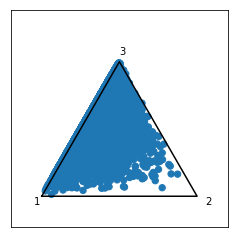

0 LL = -2.1556E+04
100 LL = 2.9694E+04  delta = 1.91E-06 alpha =  [1.9158534  0.29459885 2.9197285 ]
200 LL = 2.9695E+04  delta = -1.32E-07 alpha =  [1.9370807  0.29609656 2.9533634 ]
300 LL = 2.9695E+04  delta = -1.32E-07 alpha =  [1.9374363  0.29612178 2.953927  ]
400 LL = 2.9695E+04  delta = 0.00E+00 alpha =  [1.9374382 0.2961218 2.9539287]
500 LL = 2.9695E+04  delta = 0.00E+00 alpha =  [1.9374382 0.2961218 2.9539287]
600 LL = 2.9695E+04  delta = 0.00E+00 alpha =  [1.9374382 0.2961218 2.9539287]
700 LL = 2.9695E+04  delta = 0.00E+00 alpha =  [1.9374382 0.2961218 2.9539287]
800 LL = 2.9695E+04  delta = 0.00E+00 alpha =  [1.9374382 0.2961218 2.9539287]
900 LL = 2.9695E+04  delta = 0.00E+00 alpha =  [1.9374382 0.2961218 2.9539287]
1000 LL = 2.9695E+04  delta = 0.00E+00 alpha =  [1.9374382 0.2961218 2.9539287]


In [22]:
N = 10000;
_alpha = np.array([2.0, .3, 3.0]);
dist = dirichlet(_alpha);
print_rate = 100;

_x = dist.rvs(N)
plt.figure();
scatter(_x);
plt.show();

num_iters = 1000;
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer());
    feed_dict = {x:_x};
    _ts, _log_lik_prev, _alpha = sess.run([ts, log_lik, alpha], feed_dict);
    print(0, 'LL = %.4E' % _log_lik_prev); 
    for i in range(1,num_iters):
        _ts, _log_lik, _grad, _alpha = sess.run([ts, log_lik, grad, alpha], feed_dict);
        delta = (_log_lik - _log_lik_prev) / _log_lik_prev;
        _log_lik_prev = _log_lik;
        
        grad_norm = np.linalg.norm(_grad);
        if (np.mod(i+1,print_rate)==0):
            print(i+1, 'LL = %.4E  delta = %.2E' % (_log_lik, delta), 'alpha = ', _alpha);
        